# Statistics

## Normality Tests

The normal distibution can be considered the most important distribution in finance and one of the mojor statistical building blocks of financial theory. The following conerstones of financial theory rest to a large extent on the assumption that returns of a financial instrument are normally distributed.

<b>Portfolio theory</b>

When stock returns are normally distributed, optimal portfolio choice  can be cast into a setting where only the (expected) mean return and the variance of the returns (or the volatility) as well as the covariances between different stocks are relevant for an investment decision.

<b>Capital asset pricing model</b>

When stock returns are normally distributed, prices of single stocks can be elegantly expressed in linear relationship to a broad market index; the relationship is generally expressed by a measure for the co-movement of a single stock with the market index called beta or $\beta$.

<b>Efficient markets hypothesis</b>

An efficient market is a market where prices reflect all available information. If this hypothesis holds true, then stock prices fluctuate randomly and returns are normally distributed.

<b>Option pricing theory</b>

Brownian motion is the benchmark model for the modeling of random movements of financial instruments; the famous Black-Scholes-Merton option pricing formula uses a geometric Brownian motion as the model for a stock's random price fluctuation over time, leading to log-normally distributed prices and normally distributed returns.

### Benchmark Case

The analysis starts with the geometric Brownian motion as one of the canonical stochasitc processes. The following can be said about the characteristics of paths from a geometric Brownian motion $S$:

<b>Normal log returns</b>

Log returns $\log\frac{S_t}{S_s}=\log S_t - \log S_s$ between two times $0<s<t$ are normally distributed

<b>Log-normal values</b>

At any time $t>0$, the values $S_t$ are log-normally distributed.

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt 

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

%matplotlib inline

/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_93589/3663707900.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int 
        number of time steps/intervals
    
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    
    '''

    dt = T / M 
    paths = np.zeros((M + 1, I))
    paths[0] = S0 
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()        # Mathcing first and second moment
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)        # Vectorized Euler discretization of geometric Brownian motion  
    
    return paths

In [3]:
S0 = 100.       # Initial value for simulated processes
r = 0.05        # Constant short rate
sigma = 0.2     # Constant volatility factor
T = 1.0         # Time horizon in year fractions
M = 50          # Number of time invervals
I = 250000    
np.random.seed(1000)

In [4]:
paths = gen_paths(S0, r, sigma, T, M, I)

In [5]:
S0 * math.exp(r * T)        # Expected value and average simulated value

105.12710963760242

In [6]:
paths[-1].mean()            # Expected value and average simulated value

105.12645392478755

Text(0, 0.5, 'index level')

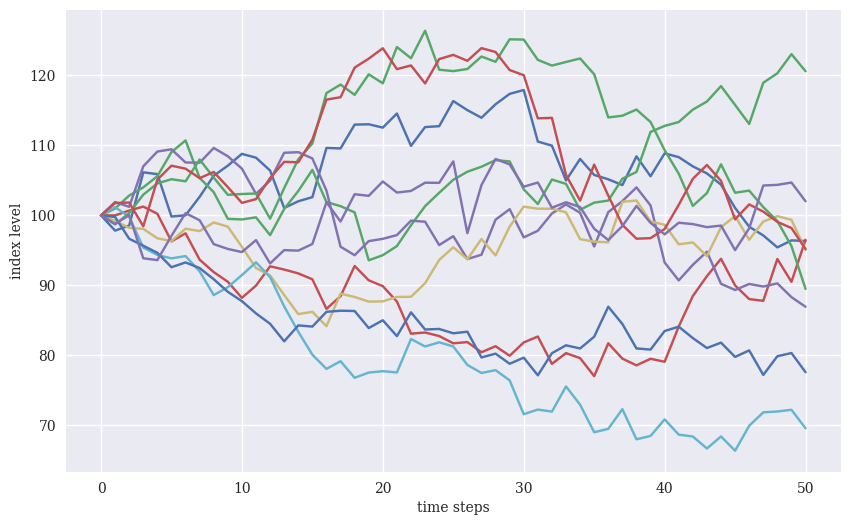

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('time steps')
plt.ylabel('index level')

The main interest is in the distribution of the log returns. An `ndarray` object with all the log returns is created based on the simulated paths. Here, a single simulated path and the resulting log returns are shown.

In [8]:
paths[:, 0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [9]:
log_returns = np.log(paths[1:] / paths[:-1])

log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

This is something one might experience in financial markets: days when one makes a positive return on an investment and other days when one is losing money relative to the most recent wealth position.

In [10]:
def print_statistics(array):
    ''' Prints selected statistics
    
    Parameters
    ==========
    array : ndarray
        object to generate statistics on
    '''

    sta = scs.describe(array)
    print('%14s %15s' % ('statistics', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', sta[3]))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))

In [11]:
print_statistics(log_returns.flatten())

    statistics           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.00080
          skew         0.00055
      kurtosis         0.00085


In [12]:
log_returns.mean() * M + 0.5 * sigma ** 2       # Annualized mwan log return after correction for the Ito Lemma

0.05000000000000006

In [13]:
log_returns.std() * math.sqrt(M)                # Annulized volatility; i.e., annulaized standard deviation of log returns

0.20000000000000015

One would expect annulized values of 0.05 for the mean return (after correcting for the Ito term) and 0.2 for the standard deviation (volatility). The annulized values almost match these value perfectly (multiply the mean value by 50 and correct it for the Ito term; multiply the standard deviaion by $\sqrt{50}$)

The frequency distribution of the simulated log returns with the probability density function (PDF) of the normal distribution given the parametizations for `r` and `sigma`.

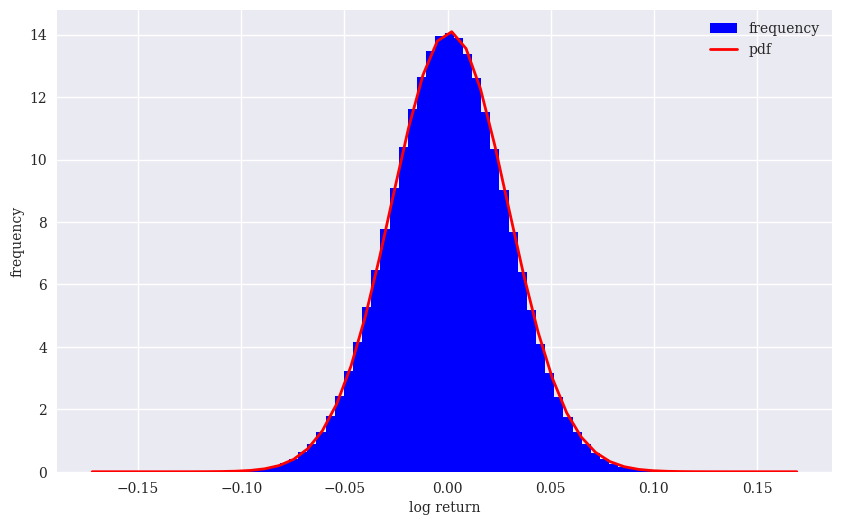

In [14]:
# Histogram of log returns of geometric Brownian motion and normal density function

plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True, label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')
plt.legend()

Comparing a frequency distribution (histogram) with a theoretical PDF (probability density function) is not the only way to graphically "test" for noramlity. So-called quantile-quatile (QQ) plots are also well suited fot this task. For normally distributed sample data sets, such a plot might look like figure below, with the absolute values (dots) lying on a straight line.

Text(0, 0.5, 'sample quantiles')

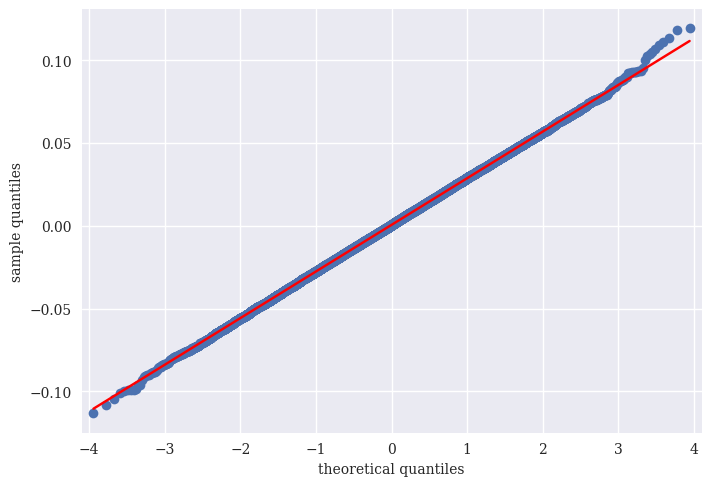

In [15]:
# Quantile-quantile plot for log returns of geometric Brownian motion

sm.qqplot(log_returns.flatten()[::500], line='s')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

The function `normality_tests()` used in the next example combines three different statistical tests.

<b>Skewness test (`skewtest()`)</b>

This tests whether the skew of the sample data is "normal" (i.e., has a value close enough to zero.)
Skewness refers to the degree of asymmetry in a probability distribution. A normal distribution is perfectly symmetrical, so its skewness is zero. Positive skewness means that the tail of the distribution is longer on the positive side, while negative skewness means that the tail is longer on the negative side. A distribution with positive skewness has more observations on the left side of the distribution than the right, and vice versa for negative skewness.


<b> Kurtosis test (`kurtosistest()`)</b>

This test whehter the kurtosis of the sample data is "normal".

Kurtosis, on the other hand, measures the degree of peakedness in a probability distribution. A normal distribution has a kurtosis of 3, which is called mesokurtic. A distribution with a kurtosis less than 3 is called platykurtic, which means it is flatter and has fewer outliers than a normal distribution. A distribution with a kurtosis greater than 3 is called leptokurtic, which means it is more peaked and has more outliers than a normal distribution.

<b> Normality test(`normaltest()`)</b>

This combines the other two test approaches to test for normality.


Normality is a property of a probability distribution where the data is symmetric and bell-shaped, with the mean, median, and mode all being equal. In practice, many statistical methods assume that the data is normally distributed, so normality is an important concept in statistics. However, real-world data often deviates from a normal distribution, and in such cases, alternative statistical methods may be required.


The test values indicate that the log returns of the geometric Brownian motion are indeed normally distributed - i.e., they show $p$-value of 0.05 or above.



In [16]:
def normality_test(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array : ndarray
        object to generate statistics on
    
    '''

    print('Skew of data set %14.3f' % scs.skew(arr))
    print('Skew test p-value %14.3f' % scs.skewtest(arr)[1])
    print('Kurt of data set %14.3f' % scs.kurtosis(arr))
    print('Kurt test p-value %14.3f' % scs.kurtosistest(arr)[1])
    print('Norm test p-value %14.3f' % scs.normaltest(arr)[1])

In [17]:
normality_test(log_returns.flatten())       # all p-value are well above 0.05

Skew of data set          0.001
Skew test p-value          0.430
Kurt of data set          0.001
Kurt test p-value          0.541
Norm test p-value          0.607


A check whether the end-of-period values are indeed log-normally distributed. This boils down to a normality test, since one only has to transform the data by applying the log function to it to then arrive at normally distributed values. Figure below plots both the log-normally distributed end-of-period values and the transformed ones ("log index level").

Text(0.5, 1.0, 'log data')

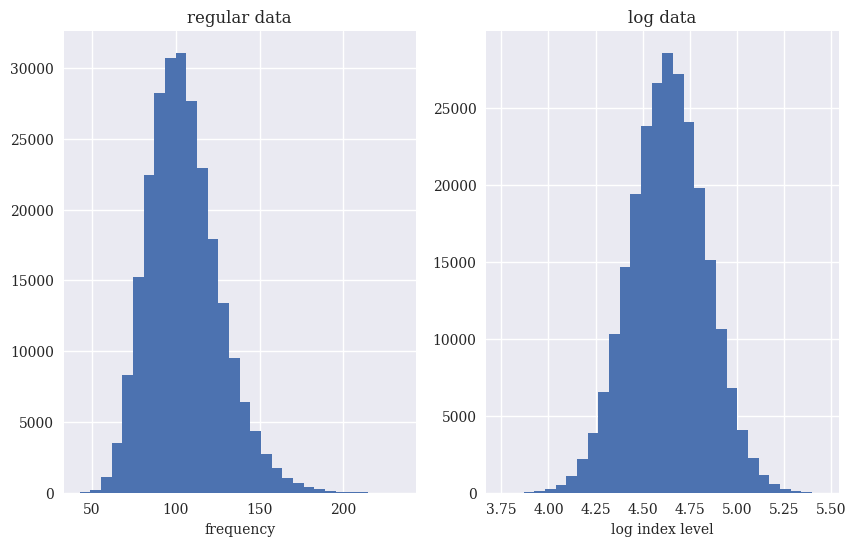

In [18]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))
ax1.hist(paths[-1], bins=30)
ax1.set_xlabel('index level')
ax1.set_xlabel('frequency')
ax1.set_title('regular data')

ax2.hist(np.log(paths[-1]), bins=30)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

This statistics for the data set how expected behavior - for example, a mean value close to 105. The long index level values have skew and kurtosis values close to zero and they show high $p$-values, providing stong support for the normal distribution hypothesis.

In [19]:
print_statistics(paths[-1])

    statistics           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std       450.78672
          skew         0.61116
      kurtosis         0.65182


In [20]:
print_statistics(np.log(paths[-1]))

    statistics           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.03999
          skew        -0.00092
      kurtosis        -0.00327


Figure below comapres the frequency distribution with the PDF of the nomral distribution, showing a pretty goof fit.

<b>PDF (probability density funciton)</b>

The probability density function (PDF) of the normal distribution is given by the following equation:
$$f(x)=\left(\frac{1}{\sigma}\sqrt{2\pi}\right)\times e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

where:

- μ is the mean of the distribution.

- σ is the standard deviation of the distribution.

- e is the mathematical constant e (approximately equal to 2.71828).

- π is the mathematical constant pi (approximately equal to 3.14159).

- x is any value on the x-axis.

The normal distribution, also known as the Gaussian distribution, is a continuous probability distribution that is often used to model real-world phenomena such as measurements, errors, and other variables that are influenced by multiple factors. The PDF of the normal distribution is a bell-shaped curve that is symmetric around the mean, with the highest point of the curve located at the mean. The standard deviation determines the spread of the distribution, with smaller values of σ resulting in a narrower and taller curve, and larger values of σ resulting in a flatter and wider curve.



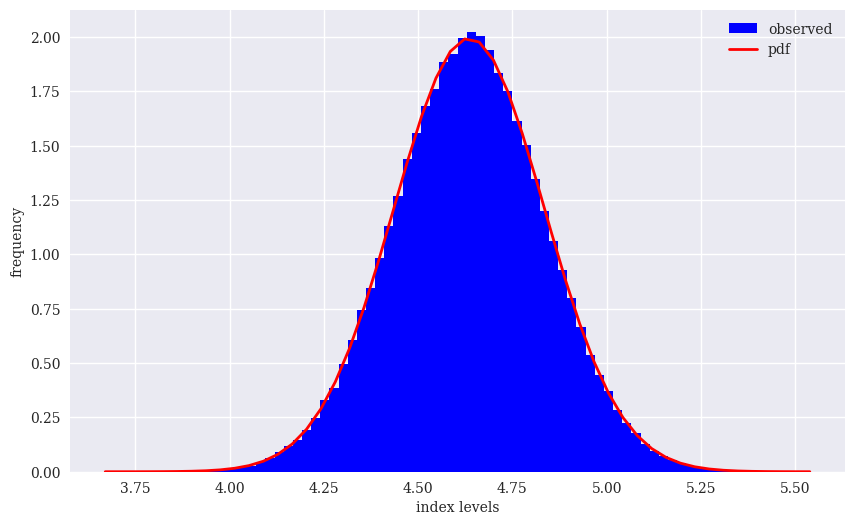

In [21]:
plt.figure(figsize=(10, 6))
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, density=True, label='observed', color='b')
plt.xlabel('index levels')
plt.ylabel('frequency')

x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()), 'r', lw=2.0, label='pdf')
plt.legend()

Text(0, 0.5, 'sample quantities')

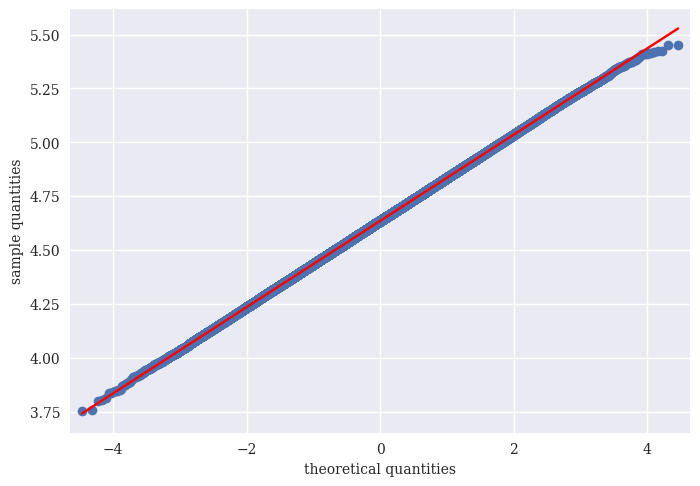

In [22]:
# Figure below also supports the hypothesis that the log index levels are noramlly distributed.å
sm.qqplot(log_data, line='s')
plt.xlabel('theoretical quantities')
plt.ylabel('sample quantities')

### Real-World Data

We will analyzes four historical financial time series, two for technology stocks and two for exchange traded funcs (ETFs).

- APPL. 0: Apple Inc. stock price
- MSFT. 0: Microsoft Inc. stock price
- SPY : SPDR S&P 500 ETF Trust
- GLD : SPDR Gold Trust

In [23]:
import pandas as pd

raw = pd.read_csv('./source/tr_eikon_eod_data.csv', index_col=0, parse_dates=True).dropna()

In [24]:
symbols = ['SPY', 'GLD', 'AAPL.O', 'MSFT.O']

In [25]:
data = raw[symbols]
data = data.dropna()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     2138 non-null   float64
 1   GLD     2138 non-null   float64
 2   AAPL.O  2138 non-null   float64
 3   MSFT.O  2138 non-null   float64
dtypes: float64(4)
memory usage: 83.5 KB


In [27]:
data.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,113.33,109.80,30.572827,30.950
2010-01-05,113.63,109.70,30.625684,30.960
2010-01-06,113.71,111.51,30.138541,30.770
2010-01-07,114.19,110.82,30.082827,30.452
2010-01-08,114.57,111.37,30.282827,30.660


<Axes: xlabel='Date'>

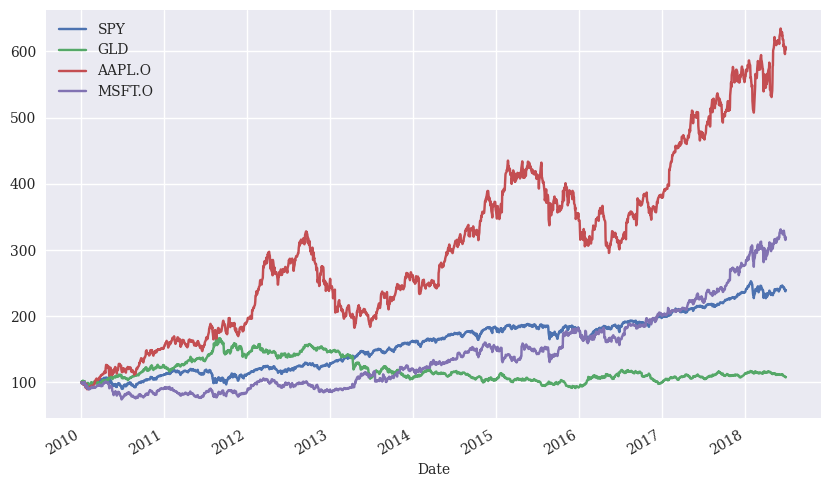

In [28]:
(data / data.iloc[0] * 100).plot(figsize=(10, 6))

In [29]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,SPY,GLD,AAPL.O,MSFT.O
Date,,,,
2010-01-04,NaN,NaN,NaN,NaN
2010-01-05,0.002644,-0.000911,0.001727,0.000323
2010-01-06,0.000704,0.016365,-0.016034,-0.006156
2010-01-07,0.004212,-0.006207,-0.001850,-0.010389
2010-01-08,0.003322,0.004951,0.006626,0.006807


array([[<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>],
       [<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>]], dtype=object)

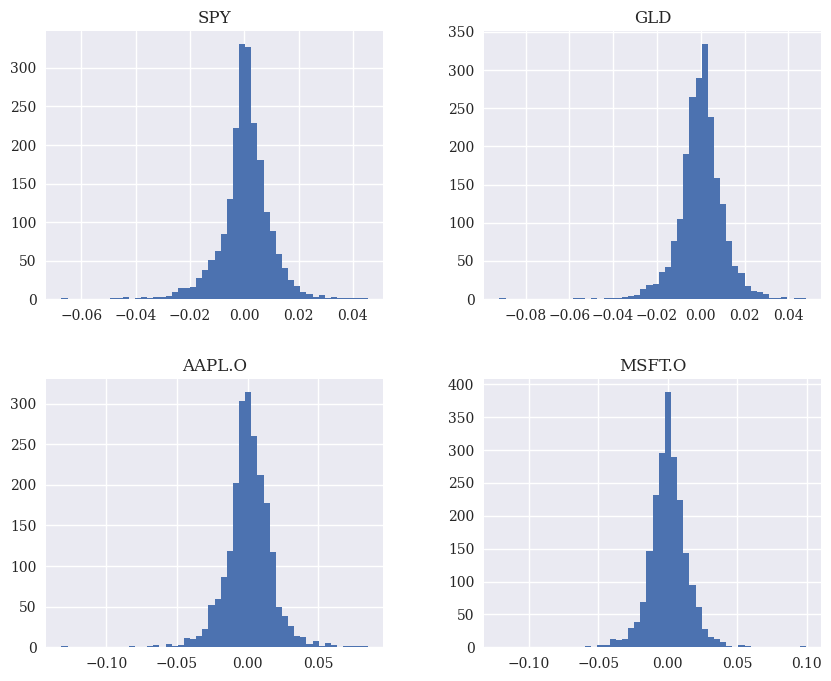

In [30]:
log_returns.hist(bins=50, figsize=(10, 8))

In [31]:
# The kurtosis values seem to be especially far from normal for all four data sets.

for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)      # statistics for time series of financial instruments


Results for symbol SPY
------------------------------
    statistics           value
------------------------------
          size      2137.00000
           min        -0.06734
           max         0.04545
          mean         0.00041
           std         0.00009
          skew        -0.52189
      kurtosis         4.52432

Results for symbol GLD
------------------------------
    statistics           value
------------------------------
          size      2137.00000
           min        -0.09191
           max         0.04795
          mean         0.00004
           std         0.00010
          skew        -0.59934
      kurtosis         5.68423

Results for symbol AAPL.O
------------------------------
    statistics           value
------------------------------
          size      2137.00000
           min        -0.13187
           max         0.08502
          mean         0.00084
           std         0.00025
          skew        -0.23510
      kurtosis         4.7

Figure below shows the QQ plot for the `SPY` ETF. The sample quantile values do not lie on a straight line, indicating "non-narmality". The time series data exhibits fat tails, referring to a dsitribution where large negative and positive values are observed more often than a noraml distirubtion would imply.

Text(0, 0.5, 'sample quantiles')

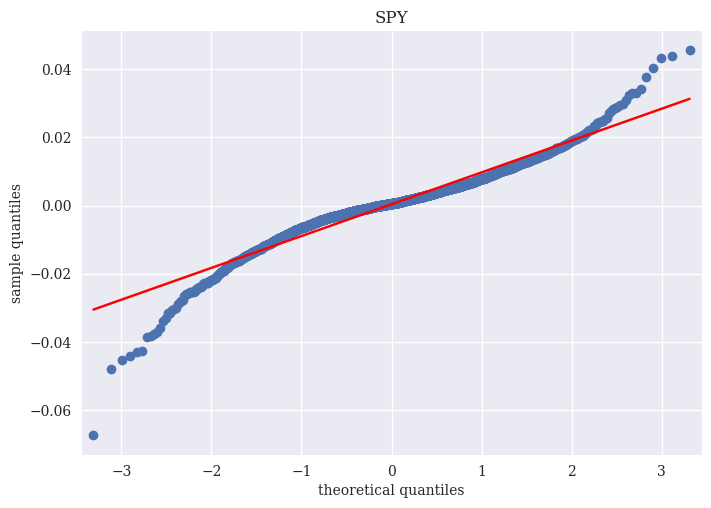

In [32]:
sm.qqplot(log_returns['SPY'].dropna(), line='s')
plt.title('SPY')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

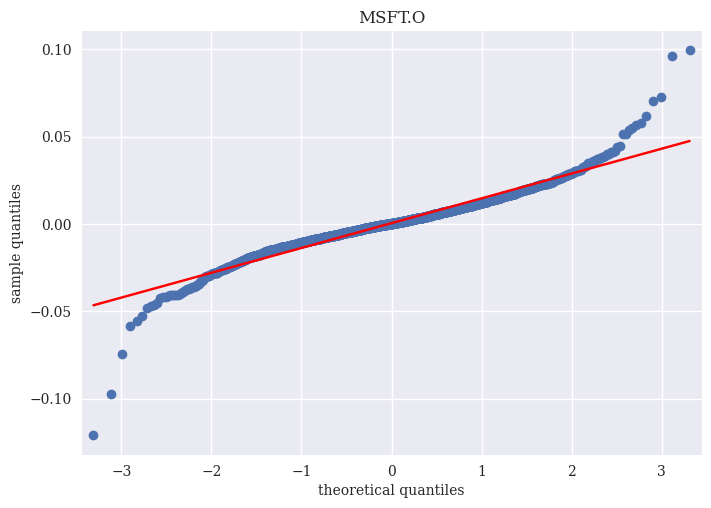

In [33]:
sm.qqplot(log_returns['MSFT.O'].dropna(), line='s')
plt.title('MSFT.O')
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [34]:
# This finally leads to the statistical normality tests.

for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(32 * '-')
    log_data = np.array(log_returns[sym].dropna())
    normality_test(log_data)



Results for symbol SPY
--------------------------------
Skew of data set         -0.522
Skew test p-value          0.000
Kurt of data set          4.524
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol GLD
--------------------------------
Skew of data set         -0.599
Skew test p-value          0.000
Kurt of data set          5.684
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol AAPL.O
--------------------------------
Skew of data set         -0.235
Skew test p-value          0.000
Kurt of data set          4.790
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT.O
--------------------------------
Skew of data set         -0.091
Skew test p-value          0.085
Kurt of data set          7.291
Kurt test p-value          0.000
Norm test p-value          0.000


The p-value of the different tests are all zero, strongly rejecting the test hypothesis that the different sample data sets are normally distributed. This shows that the normal assumption for stock market returns and other asset classes - for exmaple, embodied in the gewometric Brownian motion model - cannot be justified in general and that one might have to use richer models that are able to generate fat tails (e.g., jump diffustion models or models with stochastic volatility).

## Portfolio Optimization



### The Data

The basic idea of MPT (modern portfolio theory)is to make use of diversification to achieve a minimal portfolio risk given a target return level or a maximum portfolio return given a certain level of risk.



array([[<Axes: title={'center': 'AAPL.O'}>,
        <Axes: title={'center': 'MSFT.O'}>],
       [<Axes: title={'center': 'SPY'}>, <Axes: title={'center': 'GLD'}>]],
      dtype=object)

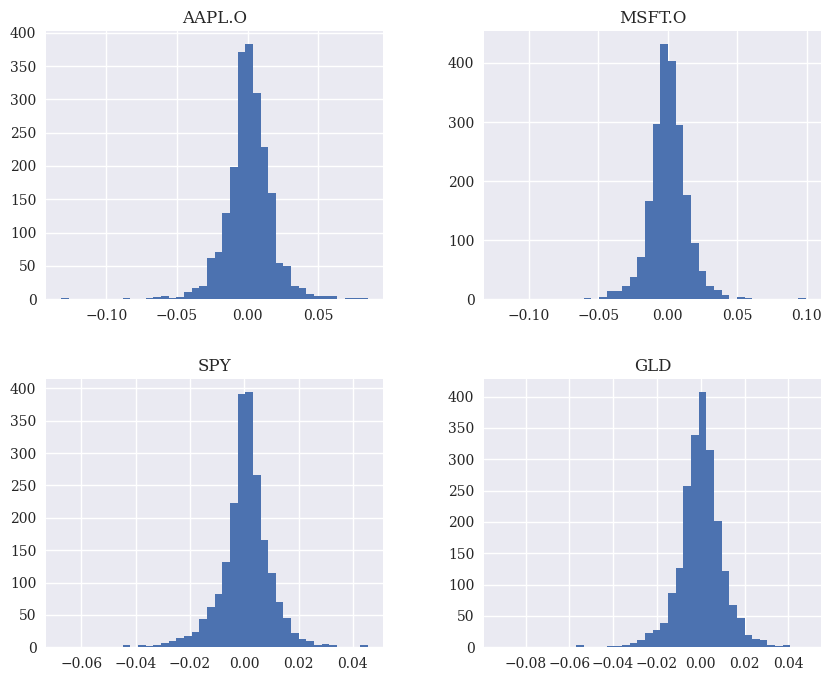

In [35]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']        # four financial instruments for portfolio composition
noa = len(symbols)          # number of financial instruments defined
data = raw[symbols]

rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8))

In [36]:
rets.mean() * 252       # annualized mean returns

AAPL.O    0.212359
MSFT.O    0.136648
SPY       0.102928
GLD       0.009141
dtype: float64

In [37]:
rets.cov() * 252        # annualized covariance matrix

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.063773,0.023427,0.021039,0.001513
MSFT.O,0.023427,0.050917,0.022244,-0.000347
SPY,0.021039,0.022244,0.021939,0.000062
GLD,0.001513,-0.000347,0.000062,0.026209


### The Basic Theory

It is assumed that only long positions are allowed which implies that 100% of the investor's wealth has to be divided among the available instruments in such a way that all positions are long(positive) and that the positions add up to 100%.

In [38]:
# The following code generates four uniformly distributed random numbers between 0 and 1 
# and then normalized the values such that the sum of all values equals 1

weights = np.random.random(noa)     # Random portfolio weights
weights /= np.sum(weights)          # normalized to 1 or 100%

weights

array([0.07650728, 0.06021919, 0.63364218, 0.22963135])

In [39]:
weights.sum()

1.0

Equation below provides the formula for the expected portfolio return given the weights for the single instrumnets, an expacted portfolio return in the sense that historical mean performance is assumed to be the best estimator for future performance.

<b>General formula for expected portfolio return</b>

$$ \mu_p=\mathbf{E}(\sum_I w_ir_i)\\
= \sum_Iw_i\mathbf{E}(r_i)\\
= \sum_Iw_i\mu_i\\
=w^T\mu$$

- $r_i$ : the state-dependent future returns (vector with return value assumed to be normally distributed)
- $\mu_i$ : the expected return for instrument $i$
- $w^T$ : the transpose of the weights vector
- $\mu$ : the vector of the expected security returns

In [40]:
np.sum(rets.mean() * weights) * 252     # annualized portfolio return given the portfolio weights

0.09179459482057789

The second object of importance in MPT is the expected portfolio variance. The covariance between two securities is defined by $\sigma_{ij}=\sigma_{ji}=\mathbf{E}(r_i-\mu_i)(r_j-\mu_j)$. The variance of a security is the special case of the covariance with itself : $\sigma_i^2=\mathbf{E}((r_i-\mu_i)^2)$.

<b>Portfolio covariance matrix</b>
$$\Sigma=\begin{bmatrix}
\sigma_1^2&\sigma_{12}&\cdots&\sigma_{1I}\\
\sigma_{21}&\sigma_2^2&\cdots&\sigma_{2I}\\
\vdots&\vdots&\ddots&\vdots\\
\sigma_{I1}&\sigma_{I2}&\cdots&\sigma_{I}^2

\end{bmatrix}$$


<b>General formula for expected portfolio variance</b>
$$ \sigma_p^2=\mathbf{E}((r-\mu)^2)\\
=\sum_{i\in I}\sum_{j\in I}w_iw_j\sigma_{ij}\\
=w^T\Sigma w$$

Given the portfolio variance, the expected portfolio standard deviation or volatility $\sigma_p=\sqrt{\sigma_p^2}$ is then only one sqrare root away.

In [41]:
# the np.dot() function gives the dot product of two vectors/matrices.
# the T attribute or transpose() method gives the transpose of a vector or matrix.

np.dot(weights.T, np.dot(rets.cov() * 252, weights))    # annualized portfolio variance given the portfolio weights

0.014763288666485568

In [42]:
math.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))     # annulized portfolio volatility given the portfolio weights.

0.1215042742724945

In [43]:
# The following implements a Monte Carlo simulation to generate random porfolio weight vectors on a larger scale.
# the code records the resulting expected portfolio return and variance.

def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

prets = []
pvols = []

for p in range(2500):   # Monte Carlo simulation of portfolio weights
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(port_ret(weights))
    pvols.append(port_vol(weights))

prets = np.array(prets)     # collects the resulting statistics in list objects
pvols = np.array(pvols)

Figure below illustrates the results of the Monte Carlo simulation. It provides results for the Sharpe ratio, defined as $SR\equiv\frac{\mu_p-r_f}{\sigma_p}$ - the expected excess return of the porrfolio over the risk-free short rate $r_f$ divided by the expected standard deviation of the portfoiio. For simplicity, $r_f\equiv 0$ is assumed.

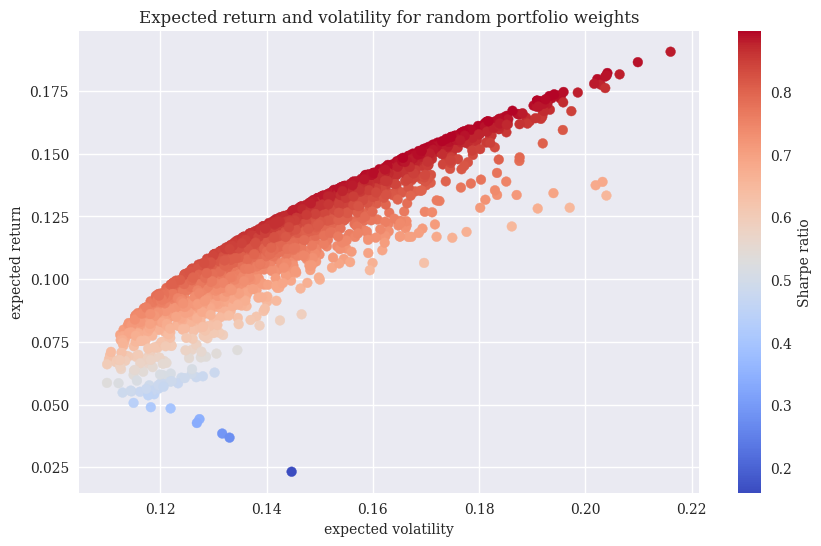

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets/pvols, marker='o', cmap='coolwarm')
plt.title('Expected return and volatility for random portfolio weights')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Optimal Portfolios

One is interested in the maximum return given a fixed risk level or the minimum risk given a fixed return expectation. This set of portfolios makes up the efficient frontier.

This minimization function is quite general and allows for equality constraints, inequality constraints, ineqaully constraints, and numerical bounds for the parameters.

First, the maximization of the Sharpe ratio. The negative value of Sharpe ratio is minimized to derive at the maximum value and the optimal portfolio composition. The constraint is that all parameters add up to 1. This can be formulated as follows using the conventions of the `minimize()` function. The parameter values (weights) are bound to be between 0 and 1.

The only input is missing for a call of the optimization functin is a starting parameter list. An equal distribution of weights will do.

In [45]:
import scipy.optimize as sco

def min_func_sharpe(weights):

    return -port_ret(weights) / port_vol(weights)   # function to be minimized

cons = ({
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1
})      # Equality constraint

bnds = tuple((0, 1) for x in range(noa))    # bounds for the parameters

In [46]:
eweights = np.array(noa * [1. / noa,])    # equal weights vector
eweights

array([0.25, 0.25, 0.25, 0.25])

In [47]:
# calling the function returns more than just the optimal parameter values.
# the results are stored in an object called opts
%time
opts = sco.minimize(
    min_func_sharpe,
    eweights,
    method='SLSQP',
    bounds=bnds,
    constraints=cons
)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


In [48]:
# the result from the optimizaiton
opts

     fun: -0.8976673894146999
     jac: array([ 8.96602869e-05,  8.30516219e-05, -2.45943666e-04,  1.92895532e-05])
 message: 'Optimization terminated successfully'
    nfev: 30
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([0.51191351, 0.19126413, 0.25454111, 0.04228125])

In [49]:
# the optimal portfolio weights
opts['x'].round(3)

array([0.512, 0.191, 0.255, 0.042])

In [50]:
# the resulting portfolio return
port_ret(opts['x']).round(3)

0.161

In [51]:
# the resulting portfolio volatility
port_vol(opts['x']).round(3)

0.18

In [52]:
# the maximum Sharpe ratio
port_ret(opts['x']) / port_vol(opts['x'])

0.8976673894146999

In [53]:
# the minimization of the variance of the porfolio

optv = sco.minimize(
    port_vol,
    eweights,
    method='SLSQP',
    bounds=bnds,
    constraints=cons
)

optv

     fun: 0.10942155263392025
     jac: array([0.11098004, 0.10948556, 0.10939826, 0.10944918])
 message: 'Optimization terminated successfully'
    nfev: 45
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.        , 0.00106171, 0.54326308, 0.45567521])

In [54]:
optv['x'].round(3)

array([0.   , 0.001, 0.543, 0.456])

In [55]:
port_vol(optv['x']).round(3)

0.109

In [56]:
port_ret(optv['x']).round(3)

0.06

In [57]:
port_ret(optv['x']) / port_vol(optv['x'])

0.5504173670813887

### Efficient Frontier

The derivation of all optimal portfilios - i.e., all portfolios with minimum volatility for a given target return level is similar to the previous optimizations. The only differnce is that one has to iterate over multiple starting conditions.

The approach taken is to fix a target return level and to derive for each such level those portfolio weights that lead to the minimum volatility value. When iterating over different target return levels(`trets`), one condition for the minimization changes. That is why the constraints dictionary is updated during every loop.

In [58]:
cons = ({'type': 'eq', 'fun': lambda x: port_ret(x) - tret},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})     # The two binding constraints for the efficient frontier

In [59]:
bnds = tuple((0, 1) for x in weights)

In [60]:
%time

trets = np.linspace(0.05, 0.2, 50)
tvols = []

for tret in trets:      # the minization of portfolio volatility for different target returns
    res = sco.minimize(
        port_vol,
        eweights,
        method='SLSQP',
        bounds=bnds,
        constraints=cons
    )

    tvols.append(res['fun'])

tvols = np.array(tvols)


CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 µs


Figure below shows the optimization results. The thick line indicates the optimal portfolios given a certain target return. The figure shows two large stars, one for the minimum volatility/variance portfolio (the leftmost portfolio) and one for the porffolio with maximum Sharpe ratio.

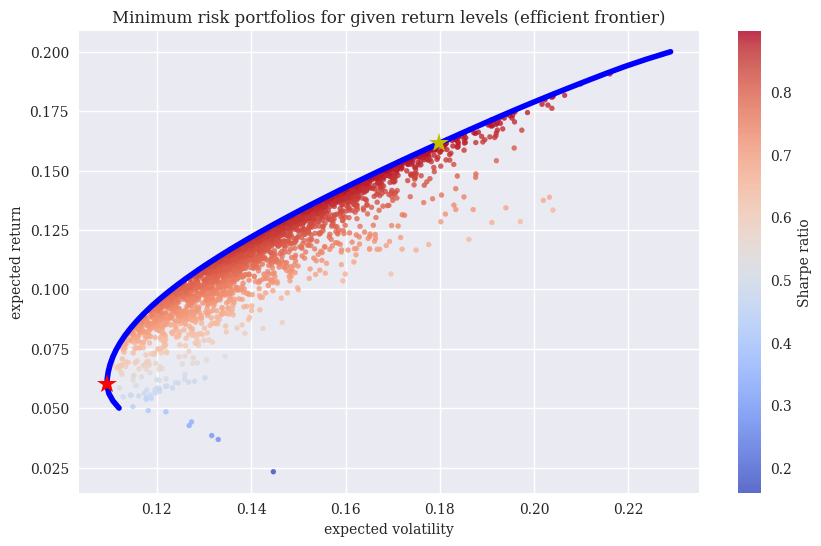

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols, marker='.', alpha=0.8, cmap='coolwarm')
plt.plot(tvols, trets, 'b', lw=4.0)
plt.plot(port_vol(opts['x']), port_ret(opts['x']), 'y*', markersize=15.0)
plt.plot(port_vol(optv['x']), port_ret(optv['x']), 'r*', markersize=15.0)
plt.title('Minimum risk portfolios for given return levels (efficient frontier)')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

The efficient frontier portfolios dominate all other porfolios in terms of expected returns given a certain risk level.

### Capital Market Line

Taking into account a riskless asset (such as cash or cash accounts) enhances the efficient investment opportunity set for investors considerably. Investors first determine an efficient porfolios of risky assets and then add the riskless asset to the mix. By adjusting the proportion of the investor's wealth to be invested in the riskless asset it is possible to achieve any risk-return profile that lies on the straight line between the riskless asset and the efficient portfolio.

Which efficient profolio is to be taken to invest in optimally? It is the one portfolio where the tangent line of the efficient frontier goes exactly through the risk-return point of the riskless portfolio.

For the calculations, a functional approximation and the first derivativce for the efficient frontier are used. Cubic splines interpolation provides such a differentiable functional appoximation. For the spline interpolation, only those portfolios from the efficient frontier are used. Via this numerical apporach it is possible to define a continuously differentiable function `f(x)` for the efficient frontier and the respective first derivative function `df(x)`.

In [62]:
import scipy.interpolate as sci 

ind = np.argmin(tvols)      # index position of minimum volatility profolios
evols = tvols[ind:] 
erets = trets[ind:]         # relevant portfolio volatility and return values

tck = sci.splrep(evols, erets)   # cubic splines interpolation on these values

In [63]:
def f(x):
    ''' Efficient frontier function
    (splines approximation)
    
    '''
    return sci.splev(x, tck, der=0)

def df(x):
    ''' First derivative of efficient frontier function
    '''
    return sci.splev(x, tck, der=1)

What is now to be derived is a linear function $t(x)=a+b\cdot x$ representing the line that passes through the riskless asset in risk-return space and that is tangent to the efficietn frontier.

<b>Mathematical conditions for capital marker line</b>

$$t(x) = a + b\cdot x\\
t(0)=r_f  \Leftrightarrow a=r_f\\
t(x)=f(x) \Leftrightarrow a+b\cdot x = f(x)\\
t'(x) =f'(x) \Leftrightarrow b = f'(x)
$$

The function `sco.fsolve()` from `scipy.optimize` is capable of solving such a system of equations. In addition to the function `equations()`, an initial parameterization is provided.

In [64]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])   # the equations describing the capital marker line (CML)

    return eq1, eq2, eq3

In [65]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])      # solving these eqautions for given initial values

In [66]:
opt     # the optimal parameter values

array([0.01      , 0.84470952, 0.19525392])

In [67]:
np.round(equations(opt), 6)     # the equation values are all zero

array([ 0.,  0., -0.])

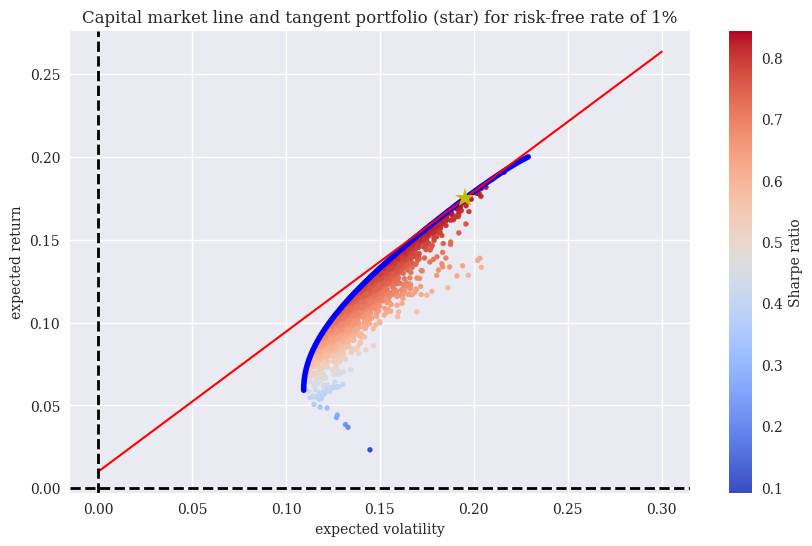

In [68]:
# the star represents the optimal portfolio from the efficietn frontier.

plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=(prets - 0.01) / pvols, marker='.', cmap='coolwarm')
plt.plot(evols, erets, 'b', lw=4.0)
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, 'r', lw=1.5)
plt.plot(opt[2], f(opt[2]), 'y*', markersize=15.0)
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.title('Capital market line and tangent portfolio (star) for risk-free rate of 1%')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [69]:
cons = (
    {
    'type': 'eq',
    'fun': lambda x: port_ret(x) - f(opt[2])
    },
    {
    'type': 'eq',
    'fun': lambda x: np.sum(x) - 1
    }
)

In [70]:
res = sco.minimize(
    port_vol, 
    eweights,
    method='SLSQP',
    bounds=bnds,
    constraints=cons
)

In [71]:
res['x'].round(3)

array([0.59 , 0.221, 0.189, 0.   ])

In [72]:
port_ret(res['x'])

0.17493284333583867

In [73]:
port_vol(res['x'])

0.1952537201232808

In [74]:
port_ret(res['x']) / port_vol(res['x'])

0.8959257894056422

## Bayesian Statistics

### Bayes' Formula

The most common interpretation of Bayes' formula in finance is the diachronic interpretation, stating that over time one learns new information about certain variables or parameters of interest, like mean return of a time series.

<b>Bayes' formula</b>

$$p(H|D)=\frac{p(H)\cdot p(D|H)}{p(D)}$$

- $H$ : an event, the hypothesis

- $D$ : the data, an experiment

- $p(H)$ : the prior probability

- $p(D)$ : the probability for the data under any hypothesis, called the normalizing constant

- $p(D|H)$ : the likelihood (the probability) of the data under hypothesis $H$

- $p(H|D)$ L the posterior probability; i.e., after one has seen the data

Consider a simple example. There are two boxes, $B_1$ and $B_2$. $B_1$ contains 30 black balls and 60 red balls, while box $B_2$ contains 60 black balls and 30 red balls. A ball is randomly drawn from one of the two boxes. Assume the ball is black. What are the probabilities for the hypothesis "$H_1$ : Ball is from box $B_1$", and "$H_2$ : Ball is from box $B_2$," respectively?

Before the random draw of the ball, both hypothesis are equally likely. After it is clear that the ball is black, one has to update the probability for both hypothesis according to Bayes' formula. 

Consider hypothesis $H_1$:

- Prior: $p(H_1)=\frac{1}{2}$

- Normalizing constant:
$p(D)=\frac{1}{2}\cdot \frac{1}{3}+\frac{1}{2}\cdot\frac{2}{3}=\frac{1}{2}$

- Likelihood: $p(D|H_1)=\frac{1}{3}$

This gives the updated probability for $H_1$ of $p(H_1|D)=\frac{\frac{1}{2}\cdot\frac{1}{3}}{\frac{1}{2}}=\frac{1}{3}$

This result also makes sense. The probability of drawing a black ball from box $B_2$ is twice as high as that of the smae event happening with box $B_1$. Therefore, having drawn a black ball, the hypothesis $H_2$ has with $p(H_2|D)=\frac{2}{3}$.


### Bayesian Regression

Consider the following exmaple based on noisy data around a straight line. Fist a linear ordinary least-squares regression is implemented on the data set.

In [75]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
from pylab import mpl, plt

sns.set()

In [76]:
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
%matplotlib inline

In [77]:
x = np.linspace(0, 10, 500)
y = 4 + 2 * x + np.random.standard_normal(len(x)) * 2

In [78]:
reg = np.polyfit(x, y, 1)

In [79]:
reg

array([2.03384161, 3.77649234])

Text(0, 0.5, 'y')

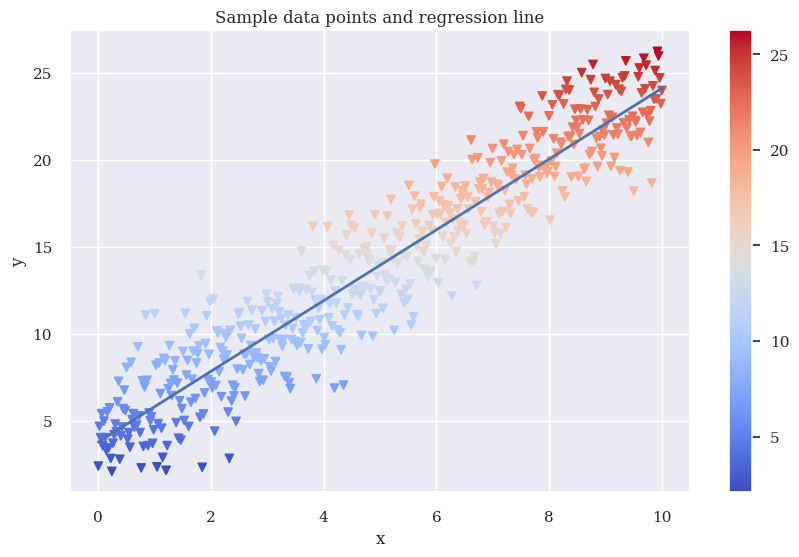

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.plot(x, reg[1] + reg[0] * x, lw=2.0)
plt.colorbar()
plt.title('Sample data points and regression line')
plt.xlabel('x')
plt.ylabel('y')

The original parameter 2 and 4 are not perfectly recovnered, but this is of course is due to the noise included in the data.

Second, a Bayesian regression making use of the `PyMC3` package. Here, it is assumed that the parameters are distributed in a certain way. Consider the equation describing the regression line $\hat{y}(x)=\alpha+\beta\cdot x$. Assume now the following priors:

- $\alpha$ : normally distributed with mean 0 and a standard deviation of 20.

- $\beta$ : normally distributed with mean 0 and a standard deviation of 10.

For the likelihood, assume a normal distribution with a mean of $\hat{y}(x)$ and a uniformly distribtuted standard deviation of between 0 and 10.

A major element of Bayesian regression is Markov chain Monte Carlo (MCMC) sampling.

For the technical sampling, there are three different functions to call:

- `find_MAP()` finds the starting point for the sampling algorithm by deriving the local maximym a posteriori point.

- `NUTS()` implements the so-called 'efficient NOT-Turn Sampler with dual averaging' (NUTS) algorithm for MCMC.

- `sample()` draws a number of samples given the starting value from `find_MAP()` and the optimal step size from the NUTS algorithm.

In [81]:
import pymc3 as pm

%time
with pm.Model() as model:
    # model
    alpha = pm.Normal('alpha', mu=0, sd=20)     # defines the priors
    beta = pm.Normal('beta', mu=0, sd=10)
    sigma = pm.Uniform('sigma', lower=0, upper=10)
    y_est = alpha + beta * x        # specifies the linear regression
    likelihood = pm.Normal('y', mu=y_est, sd=sigma, observed=y)     # defines the likelihood

    # inference
    start = pm.find_MAP()       # finds the starting value by optimization
    step = pm.NUTS()            # instantiates the MCMC algorithm
    trace = pm.sample(100, tune=1000, start=start, progressbar=True)    # draw postrior samples using NUTS

Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 11 seconds.


In [82]:
pm.summary(trace)       # estimates from the first sample

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,3.740,0.191,3.372,4.066,0.013,0.009,210.0,154.0,1.02
beta,2.040,0.032,1.987,2.104,0.002,0.002,200.0,190.0,1.02
sigma,2.009,0.058,1.906,2.116,0.004,0.003,265.0,235.0,1.01


The three estimates shown are rahter close to the original values (4, 2, 2). They are best illustrated with the help of a trace plot, a plot showing the resulting posterior distribution for the different parameters as well as all single estimator per sample.

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/traceplot.py:214: UserWarning: A valid var_name should be provided, found {'a', 'b', 's'} expected from {'sigma', 'beta', 'alpha'}
  warnings.warn(


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

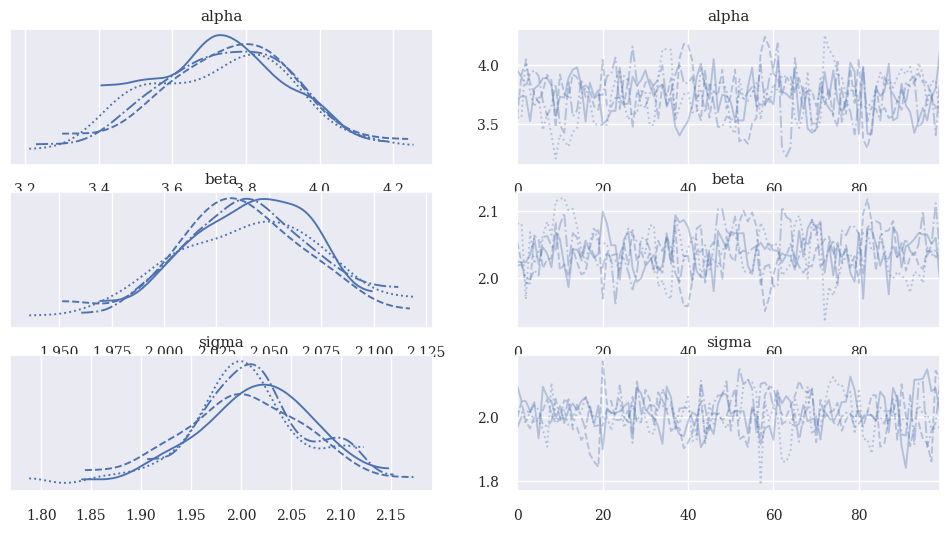

In [110]:
pm.plot_trace(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/plots/backends/matplotlib/traceplot.py:214: UserWarning: A valid var_name should be provided, found {'a', 'b', 's'} expected from {'sigma', 'beta', 'alpha'}
  warnings.warn(


array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

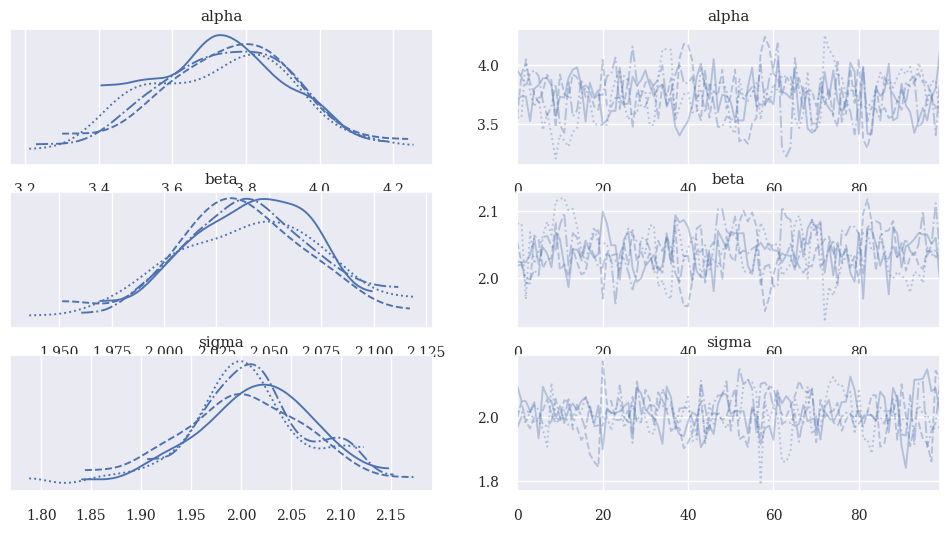

In [84]:
pm.plot_trace(trace, lines={'alpha': 4, 'beta': 2, 'sigma': 2})

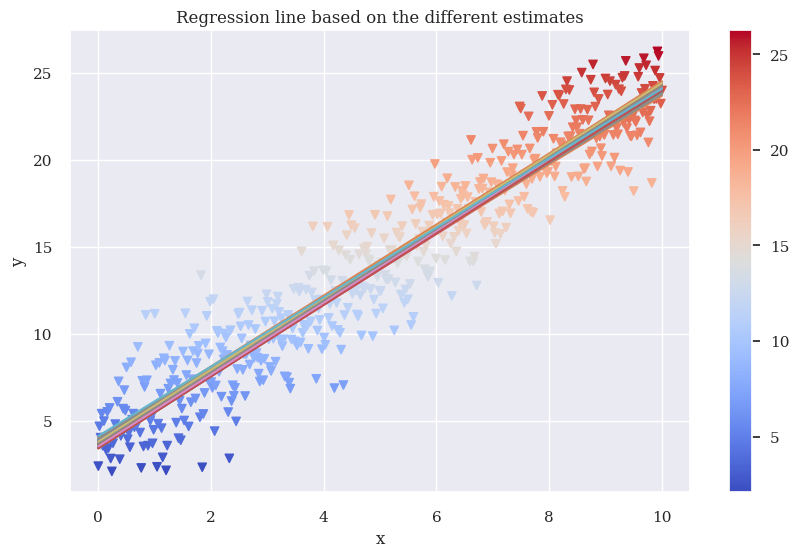

In [88]:
# Taking only the alpha and beta values form the regression, one can draw all the resulting regression lines.

plt.figure(figsize=(10, 6))
plt.scatter(x, y, c=y, marker='v', cmap='coolwarm')
plt.colorbar()
plt.title('Regression line based on the different estimates')
plt.xlabel('x')
plt.ylabel('y')
for i in range(len(trace)):
    plt.plot(x, trace['alpha'][i] + trace['beta'][i] * x)   # plots single regression lines

### Two Financial Instruments

The exmaple uses financial time series data for the two exchange traded funds (ETFs) `GLD` and `GDX`.

In [90]:
raw = pd.read_csv('./source/tr_eikon_eod_data.csv', index_col=0, parse_dates=True)
data = raw[['GDX', 'GLD']].dropna()

In [91]:
data = data / data.iloc[0]      # Normalizes the data to a staring value of 1

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2138 entries, 2010-01-04 to 2018-06-29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDX     2138 non-null   float64
 1   GLD     2138 non-null   float64
dtypes: float64(2)
memory usage: 50.1 KB


In [94]:
data.iloc[-1] / data.iloc[0] - 1     # calculate the relative performances

GDX   -0.532383
GLD    0.080601
dtype: float64

In [96]:
data.corr()     # calculates the correlation between the two instruments

,GDX,GLD
GDX,1.00000,0.71539
GLD,0.71539,1.00000


Text(0.5, 1.0, 'Normalized prices for GLC and GDX iver time')

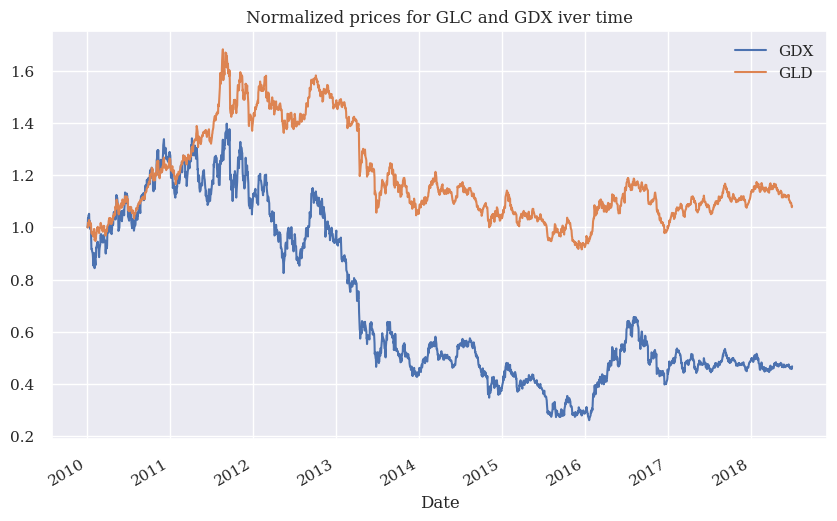

In [97]:
data.plot(figsize=(10, 6))
plt.title('Normalized prices for GLC and GDX iver time')

In [100]:
data.index[:3]

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06'], dtype='datetime64[ns]', name='Date', freq=None)

In [102]:
mpl_dates = mpl.dates.date2num(data.index.to_pydatetime()) # converts the `DatetimeIndex` object to `matplotlib` dates

In [104]:
mpl_dates[:3]

array([14613., 14614., 14615.])

The dates of the single data points are visualized in scatter plots. To this end, the `DatetimeIndex` object of the `DataFrame` is transformed to `matplotlib` dates. Figiure below shows a scatter plot of the time series data, plotting the `GLD` values against the `GDX` values and illustrating the dates of each data pair by different colorings.

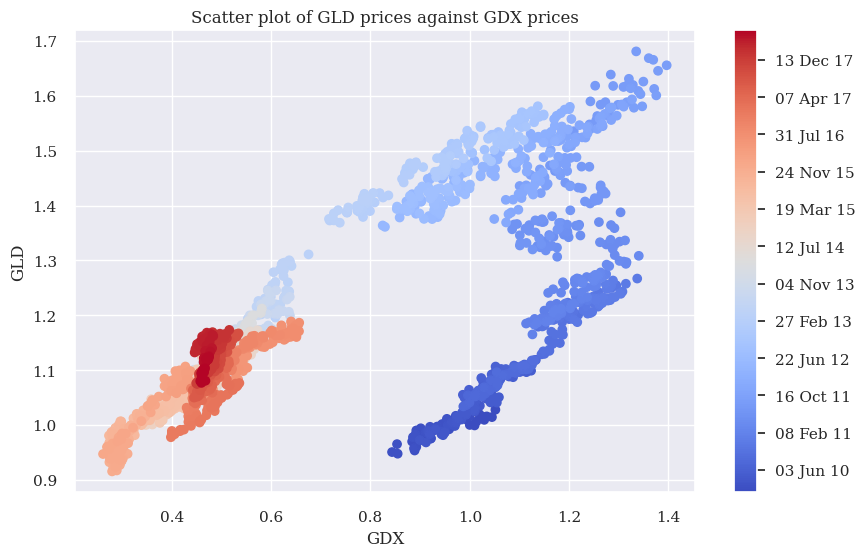

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o', cmap='coolwarm')
plt.title('Scatter plot of GLD prices against GDX prices')
plt.xlabel('GDX')
plt.ylabel('GLD')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))
# customize the color bar for the dates

In [112]:
# figure below shows the results from the MCMC sampling procedure given the assumptions about the prior probability distributions.

with pm.Model() as model:
    alpha = pm.Normal('alpha', mu=0, sd=20)
    beta = pm.Normal('beta', mu=0, sd=20)
    sigma = pm.Uniform('sigma', lower=0, upper=50)

    y_est = alpha + beta * data['GDX'].values
    likelihood = pm.Normal('GLD', mu=y_est, sd=sigma, observed=data['GLD'].values)
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(250, tune=2000, start=start, progressbar=True)

Sampling 4 chains for 2_000 tune and 250 draw iterations (8_000 + 1_000 draws total) took 13 seconds.


In [113]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,0.914,0.006,0.902,0.925,0.0,0.0,494.0,473.0,1.01
beta,0.385,0.008,0.367,0.399,0.0,0.0,514.0,475.0,1.01
sigma,0.120,0.002,0.116,0.123,0.0,0.0,521.0,330.0,1.01


/var/folders/dt/q9f0jq252ld5kmwg8rqf4pgw0000gn/T/ipykernel_93589/407438669.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  fig = pm.traceplot(trace)
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


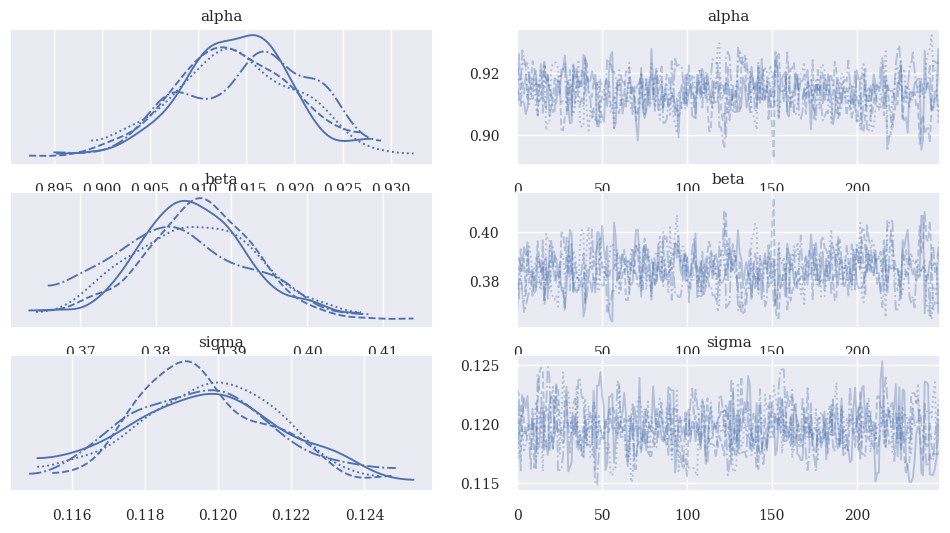

In [114]:
fig = pm.traceplot(trace)

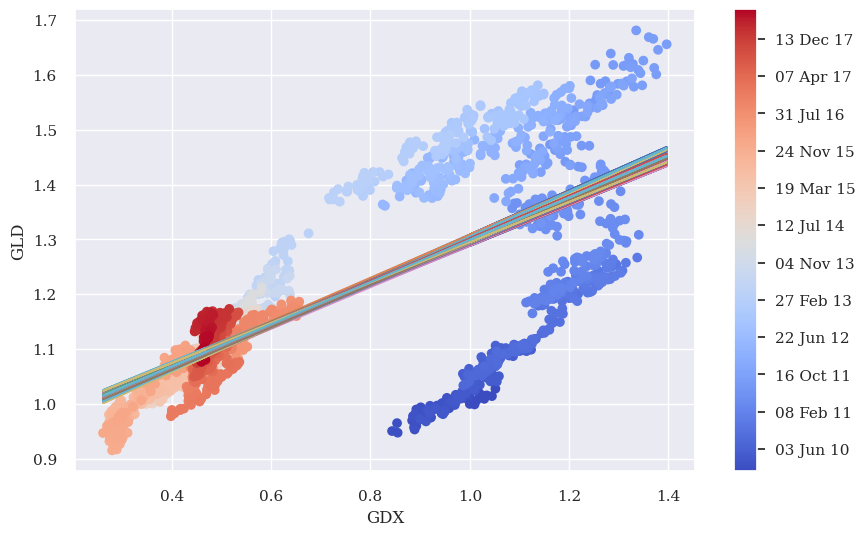

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o', cmap='coolwarm')
plt.xlabel('GDX')
plt.ylabel('GLD')
for i in range(len(trace)):
    plt.plot(data['GDX'], trace['alpha'][i] + trace['beta'][i] * data['GDX'])

plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))

The figure reveals a major drawback of the regression approach used: the approach does not take into account evolutions over tiems. That is, the most recent data is treated the same way as the oldest data.

### Updating Estimates over Time

The Bayesian approach in finance is generally most useful when seen as diachronic - i.e., in the sense that new data revealed over time allows for better regressions and estimates through updating or learning.

Assume that the regression parameters are not only random and distributed in some fashion, but that they follow some kind of random walk over time. It is the same generalizaiton used when making the transition in financial theory from random variables to stochastic processes.

Define a new `PyMC3` model, specifying parameter values as random walks. After having specified the distributions of the random walk parameters, one proceeds with specifying the random walks for `alpha` and `beta`.

In [116]:
from pymc3.distributions.timeseries import GaussianRandomWalk

subsample_alpha = 50
subsample_beta = 50

In [117]:
model_randomwalk = pm.Model()
with model_randomwalk:
    # Defines priors for the random walk parameters
    sigma_alpha = pm.Exponential('sig_alpha', 1. / .02, testval=.1)
    sigma_beta = pm.Exponential('sig_beta', 1. / .02, testval=.1)

    # Models for the random walks
    alpha = GaussianRandomWalk('alpha', sigma_alpha ** -2, shape=int(len(data) / subsample_alpha))
    beta = GaussianRandomWalk('beta', sigma_beta ** -2, shape=int(len(data) / subsample_beta))

    # Brings the parameter vectors io interval length
    alpha_r = np.repeat(alpha, subsample_alpha)
    beta_r = np.repeat(beta, subsample_beta)

    # Defines the regression model
    regression = alpha_r + beta_r * data['GDX'].values[:2100]

    sd = pm.Uniform('sd', 0, 20)    # The prior for the standard deviation
    likehood = pm.Normal('GLD', mu=regression, sd=sd, observed=data['GLD'].values[:2100])
    # Defines the likelihood with `nu` from regression results



In [122]:
%%time
import scipy.optimize as sco
with model_randomwalk:
    # start = pm.find_MAP(vars=[alpha, beta], fmin=sco.fmin_l_bfgs_b)
    start = pm.find_MAP(vars=[alpha, beta])
    step = pm.NUTS(scaling=start)
    trace_rw = pm.sample(250, tune=1000, start=start, progressbar=True)

Sampling 4 chains for 1_000 tune and 250 draw iterations (4_000 + 1_000 draws total) took 50 seconds.


CPU times: user 14 s, sys: 2.76 s, total: 16.8 s
Wall time: 2min 4s


In [124]:
pm.summary(trace_rw).head()     # the summary statistics per interval (first five and alpha only)


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/anaconda3/envs/finance/lib/python3.10/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha[0],0.671,0.039,0.588,0.736,0.001,0.001,2749.0,719.0,1.00
alpha[1],0.421,0.039,0.348,0.495,0.001,0.001,1824.0,481.0,1.01
alpha[2],0.454,0.063,0.345,0.575,0.001,0.001,1900.0,673.0,1.02
alpha[3],0.270,0.047,0.186,0.362,0.001,0.001,2429.0,722.0,1.00
alpha[4],0.652,0.054,0.556,0.755,0.001,0.001,2313.0,638.0,1.00


In [125]:
# Fugure below illustrates evolution of the regression parameters alpha and beta over time

sh = np.shape(trace_rw['alpha'])        # shape of the opject with parameter estimates
sh

(1000, 42)

In [129]:
# creates a list of dates to match the number of intervals.
part_dates = np.linspace(min(mpl_dates), max(mpl_dates), sh[1])     

# collects the relevant parameter time series in two DataFrame objects
index = [dt.datetime.fromordinal(int(date)) for date in part_dates]

alpha = {
    'alpha_%i' % i: v for i, v in enumerate(trace_rw['alpha']) if i < 20
}

beta = {
    'beta_%i' % i: v for i, v in enumerate(trace_rw['beta']) if i < 20
}


In [130]:
df_alpha = pd.DataFrame(alpha, index=index)

In [131]:
df_beta = pd.DataFrame(beta, index=index)

Text(0, 0.5, 'alpha/beta')

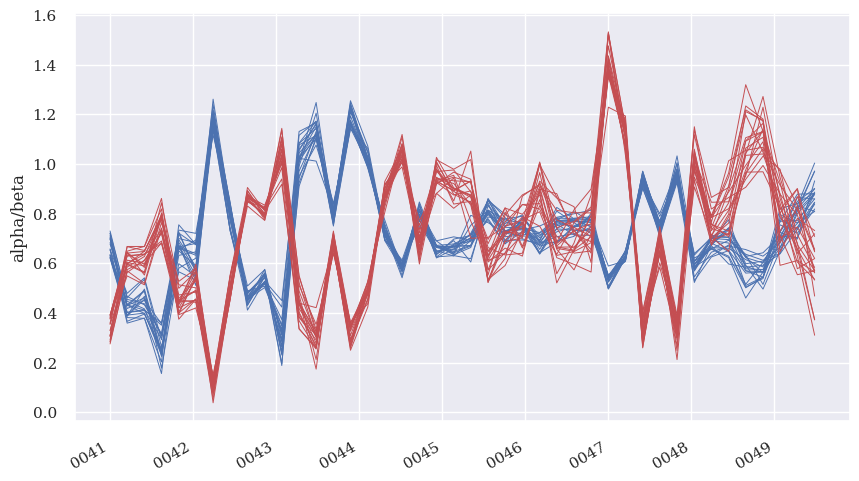

In [132]:
ax = df_alpha.plot(color='b', style='-', legend=False, lw=0.7, figsize=(10, 6))
df_beta.plot(color='r', style='-', legend=False, lw=0.7, ax=ax)
plt.ylabel('alpha/beta')

Using the mean `alpha` and `beta` values, figure below illustrates how the regression is updated over time. It is obvious that updating over time imporves the regression fit significantly - every time period needs its own regression.

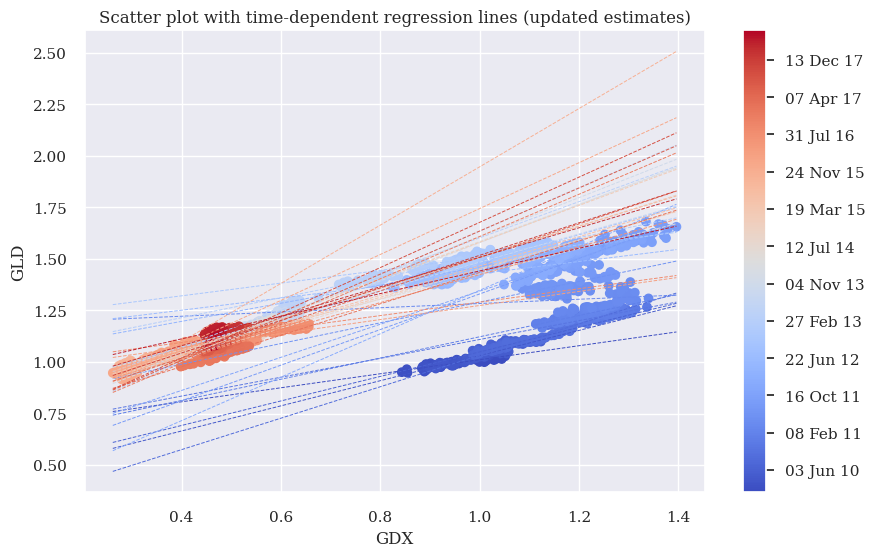

In [133]:
plt.figure(figsize=(10, 6))
plt.scatter(data['GDX'], data['GLD'], c=mpl_dates, marker='o', cmap='coolwarm')
plt.colorbar(ticks=mpl.dates.DayLocator(interval=250), format=mpl.dates.DateFormatter('%d %b %y'))
plt.title('Scatter plot with time-dependent regression lines (updated estimates)')
plt.xlabel('GDX')
plt.ylabel('GLD')
x = np.linspace(min(data['GDX']), max(data['GDX']))
for i in range(sh[1]):      # plots the regression lines for all time intervals of length 50
    alpha_rw = np.mean(trace_rw['alpha'].T[i])
    beta_rw = np.mean(trace_rw['beta'].T[i])
    plt.plot(x, alpha_rw + beta_rw * x, '--', lw=0.7, color=plt.cm.coolwarm(i / sh[1]))


Bayesian regression in particular is a tool that has become quite popular and important in quantitative finance.

## Machine Learning


### Unsupervised Learning

Unsupervised learning emnbodies the idea that a machine learning algorithm discovers insights from raw data withput any further guidance. One is the k-means algortihm and another is Gaussian mixture.

#### The data

In [134]:
# standard imoorts and configurations

import numpy as np
import pandas as pd
import datetime as dt 
from pylab import mpl, plt
import seaborn as sns

sns.set()
mpl.rcParams['font.family'] = 'serif'
np.random.seed(1000)
np.set_printoptions(suppress=True, precision=4)
%matplotlib inline

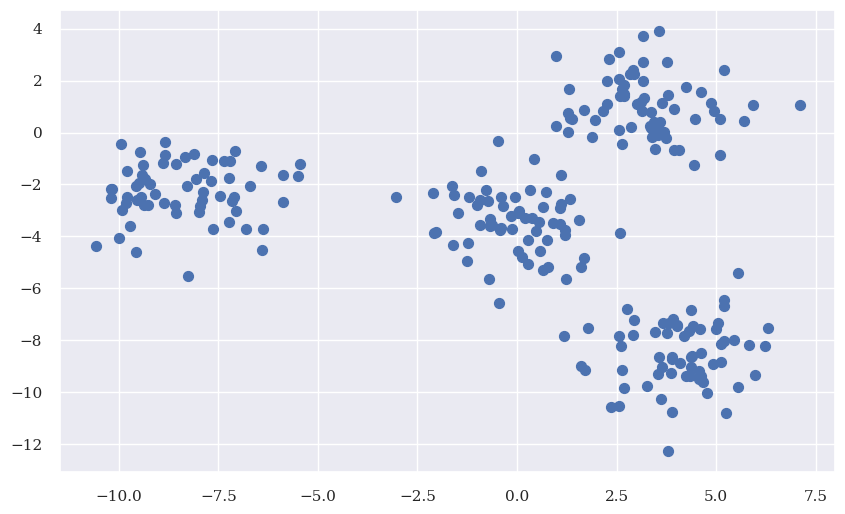

In [137]:
# the creation of the sample data set
from sklearn.datasets._samples_generator import make_blobs

# creates the sample data set for clustering with 250 samples and 4 centers 
X, y = make_blobs(n_samples=250, centers=4, random_state=500, cluster_std=1.25)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)

#### k-means clustering

- Importing the model class

- Instantiating a model object

- Fitting the model object to some data

- Predicting the outcome given the fitted model for some data

In [140]:
# imports the model class from scikit-learn
from sklearn.cluster import KMeans

# Instantiates a model object, given certain parameters
# knowledge about the sample data is used to inform the instantiation
model = KMeans(n_clusters=4, random_state=0, n_init=10)

# fits the model object to the raw data
model.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [141]:
# predicts the cluster (number) given the raw data
y_kmeans = model.predict(X)

In [142]:
# shows some cluster numbers as expected
y_kmeans[:12]

array([1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 2, 2], dtype=int32)

Text(0.5, 1.0, 'Sample data and identified clusters')

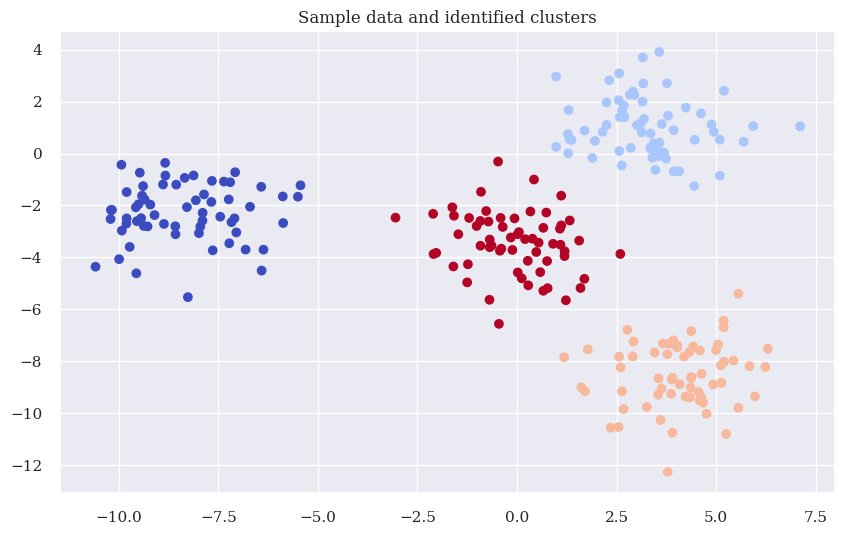

In [143]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='coolwarm')
plt.title('Sample data and identified clusters')

#### Gaussian mixture

In [144]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4, random_state=0)

In [145]:
model.fit(X)

GaussianMixture(n_components=4, random_state=0)

In [146]:
y_gm = model.predict(X)

In [147]:
y_gm[:12]

array([1, 1, 0, 3, 0, 1, 3, 3, 3, 0, 2, 2])

In [148]:
# the reuslts from k-means clustering and Gaussian mixture are the same 
(y_gm == y_kmeans).all()

True

### Supervixed Learning

Supervised learning is machine learning with some guidance in the form of known results or observed data. The algorithm can learn the relationship between the features and the categories (classes). In other words, during the fitting step, the algorithm knows the right class for the given feature value combinations

This subsection illustrates the applications of algorithms : Gaussian Naive Bayes, logistic regression, decision trees, deep neural networks, and support vector machines.

#### The data

In [149]:
from sklearn.datasets import make_classification

n_samples = 100

X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, random_state=250)

In [150]:
X[:5]

array([[ 1.6876, -0.7976],
       [-0.4312, -0.7606],
       [-1.4393, -1.2363],
       [ 1.118 , -1.8682],
       [ 0.0502,  0.659 ]])

In [151]:
X.shape

(100, 2)

In [152]:
y[:5]

array([1, 0, 0, 1, 1])

In [153]:
y.shape

(100,)

Text(0.5, 1.0, 'Sample data for the application of classification algorithms')

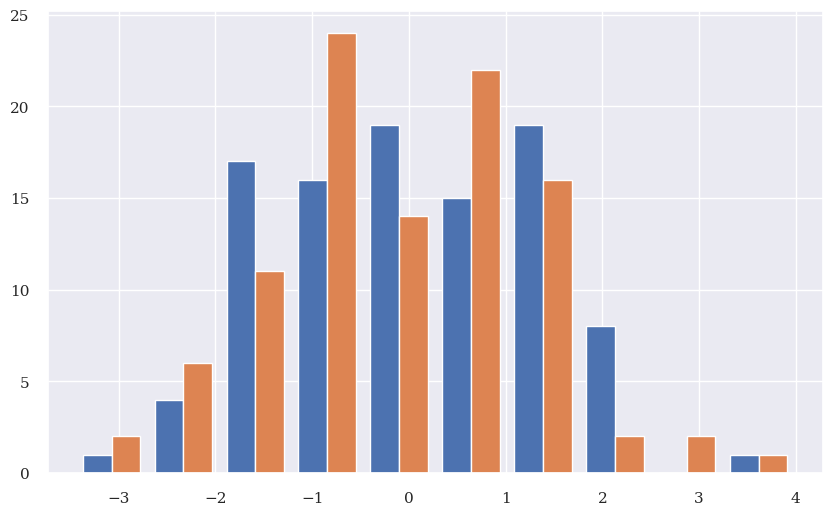

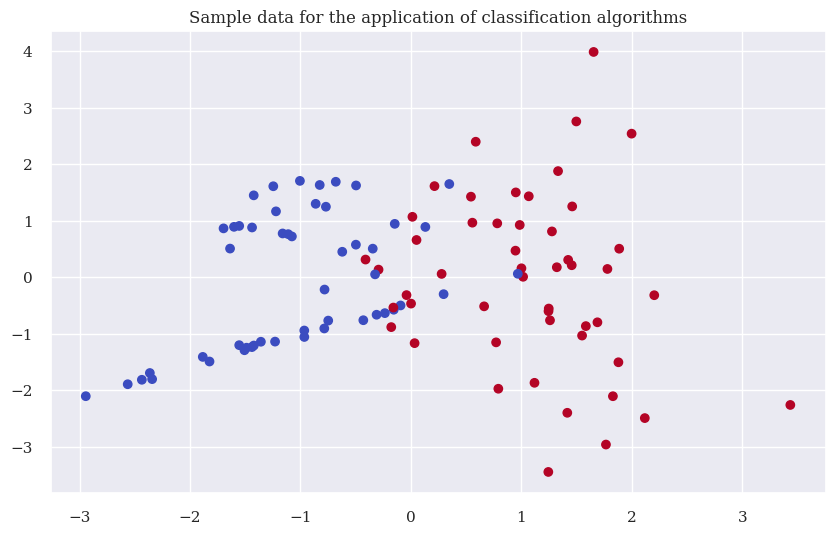

In [156]:
plt.figure(figsize=(10, 6))
plt.hist(X)
plt.figure(figsize=(10, 6))
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap='coolwarm')
plt.title('Sample data for the application of classification algorithms')

#### Gaussian Naive Bayes

In [157]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

model = GaussianNB()

model.fit(X, y)


GaussianNB()

In [158]:
# shows the probabilities that the algorithm assigns to each class after fitting
model.predict_proba(X).round(4)[:5]

array([[0.0041, 0.9959],
       [0.8534, 0.1466],
       [0.9947, 0.0053],
       [0.0182, 0.9818],
       [0.5156, 0.4844]])

In [160]:
# based on the probabilities, predicts the binary classes for the data set
pred = model.predict(X)
pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [161]:
# compares the predicted classes with the real ones
pred == y

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True])

In [162]:
# calculates the accuracy score given the predicted values
accuracy_score(y, pred)

0.87

Text(0.5, 1.0, 'Correct (dots) and flase predcitions (crosses) from GNB')

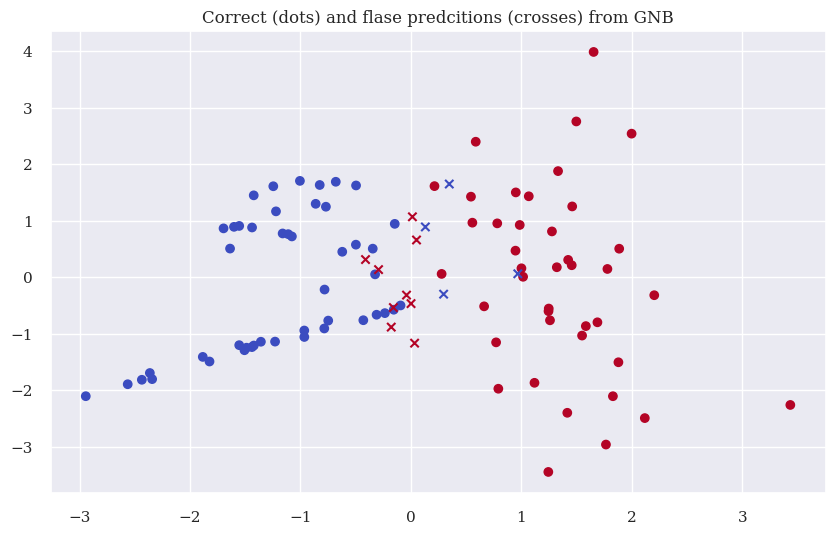

In [164]:
# visualize the correct and false predictions from GNB

# selects the correct predictions and plots them
Xc = X[y == pred]
# selects the false predictions and plots them
Xf = X[y != pred]

plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred], marker='x', cmap='coolwarm')
plt.title('Correct (dots) and flase predcitions (crosses) from GNB')

#### Logistic regression

Logistic regression (LR) is a fast and scalable classification algorithm.

In [165]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1, solver='lbfgs')

In [166]:
model.fit(X, y)

LogisticRegression(C=1)

In [167]:
model.predict_proba(X).round(4)[:5]

array([[0.011 , 0.989 ],
       [0.7266, 0.2734],
       [0.971 , 0.029 ],
       [0.04  , 0.96  ],
       [0.4843, 0.5157]])

In [168]:
pred = model.predict(X)

In [169]:
accuracy_score(y, pred)

0.9

In [170]:
Xc = X[y == pred]
Xf = X[y != pred]

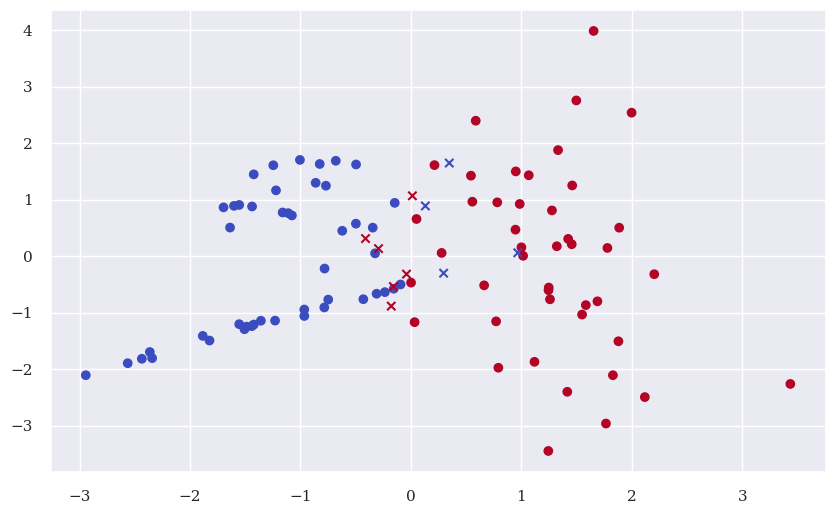

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred], marker='x', cmap='coolwarm')

#### Decision trees

In [172]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=1)

In [173]:
model.fit(X, y)

DecisionTreeClassifier(max_depth=1)

In [174]:
model.predict_proba(X).round(4)[:5]

array([[0.08, 0.92],
       [0.92, 0.08],
       [0.92, 0.08],
       [0.08, 0.92],
       [0.08, 0.92]])

In [175]:
pred = model.predict(X)

In [176]:
accuracy_score(y, pred)

0.92

In [177]:
Xc = X[y == pred]
Xf = X[y != pred]

Text(0.5, 1.0, 'Correct(dots) and false predictions(crosses) from DT (max_depth=1)')

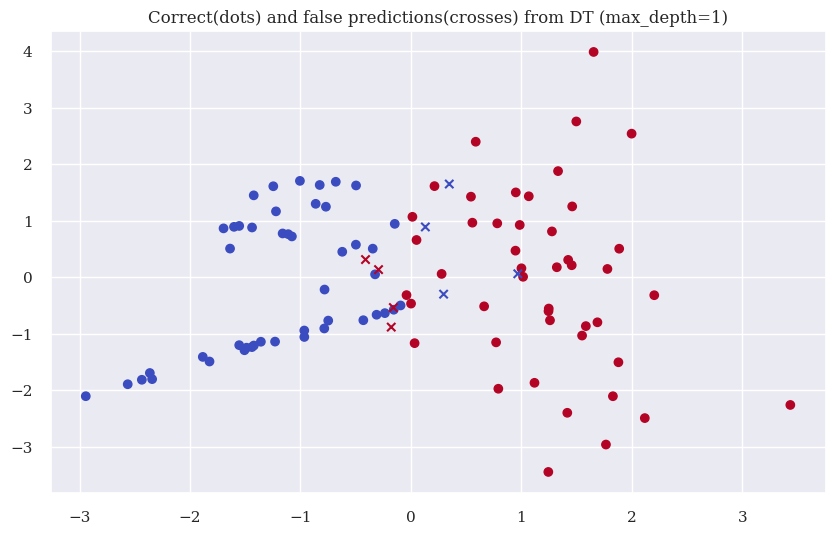

In [179]:
plt.figure(figsize=(10, 6))
plt.scatter(x=Xc[:, 0], y=Xc[:, 1], c=y[y == pred], marker='o', cmap='coolwarm')
plt.scatter(x=Xf[:, 0], y=Xf[:, 1], c=y[y != pred], marker='x', cmap='coolwarm')
plt.title('Correct(dots) and false predictions(crosses) from DT (max_depth=1)')

In [180]:
# increasing the maximum depth parameter for the decision tree allows one to reach a perfect result

print('{:<8s} | {:8s}'.format('depth', 'accuary'))
print(20 * '-')
for depth in range(1, 7):
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X, y)
    acc = accuracy_score(y, model.predict(X))
    print('{:8d} | {:8.2f}'.format(depth, acc))

depth    | accuary 
--------------------
       1 |     0.92
       2 |     0.92
       3 |     0.94
       4 |     0.97
       5 |     0.99
       6 |     1.00


#### Deep neural networks

DNNs rely on deep learning, which requires in general a large number of repeated steps to adjust certain parameters (weights) and compare the results to the data. In that sense, deep learning can be compared to Monte Carlo simulation in mathematical finance where the price of a European call option can be estimated on the basis of 100,000 simulated paths for the underlying. On the oher hand, the Black-Scholes-Merton option pricing formula is available in closed form and can be evaluated analytically.

##### DNN with scikit-learn

In [183]:
from sklearn.neural_network import MLPClassifier

# L-BFGS (Limited-memory Broyden-Fletcher-Goldfarb-Shanno) is a popular gradient-based optimization algorithm that is used to minimize or maximize an objective function.
model = MLPClassifier(
    solver='lbfgs',
    alpha=1e-5,
    hidden_layer_sizes= 2 * [75],
    random_state=10
)

In [184]:
%time model.fit(X, y)

CPU times: user 543 ms, sys: 811 ms, total: 1.35 s
Wall time: 281 ms


/opt/anaconda3/envs/finance/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=[75, 75], random_state=10,
              solver='lbfgs')

In [185]:
pred = model.predict(X)
pred

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0])

In [186]:
accuracy_score(y, pred)

1.0

##### DNN with TensorFlow

In [2]:
import tensorflow as tf

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle